In [1]:
from deap import base, creator
from deap import algorithms
from deap import tools
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os

In [2]:
# Create directory to store plots.
if not os.path.exists('./img'):
    os.makedirs('./img')

In [3]:
w_max = 6404180
answer = 13549094
iter = 1000

In [4]:
# Read both datasets to get them as CSV and parse them to a pandas dataframe.
w = pd.read_csv('./p08_w.txt', header=None)
p = pd.read_csv('./p08_p.txt', header=None)

In [5]:
# Parse them to a Numpy Array 2D to 1D.
w = np.array(w).flatten()
p = np.array(p).flatten()

In [6]:
# Parse w and p to a list.
w = list(w)
p = list(p)

In [7]:
def evalFct(u):
    """
    In this function the evaluation and the weight are calculated. Then it is penalized in case it is passed
    of the allowed weight. In the task they must make that only the evaluation is calculated and that
    in another the weight is calculated to calculate if the solution is valid or not. Can use
    tools.DeltaPenalty or the other. Check the list of functions in the library.
    """
    profit = np.sum(np.asarray(u) * np.asarray(p))
    return profit,

def is_valid_solution(u):
    """
    Function that ensures that the total weight of the backpack is not greater than the limit.
    """
    return np.sum(np.asarray(u) * np.asarray(w)) <= w_max


In [8]:
# Define if it is a maximize or minimize problem.
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# Define that individuals are lists and that it is going to be maximized.
creator.create("Individual", list, fitness=creator.FitnessMax)

In [9]:
toolbox = base.Toolbox()
# Select the selection function.
toolbox.register("select", tools.selRoulette)
# Select the mutation function.
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
# Select the reproduction one.
toolbox.register("mate", tools.cxOnePoint)
# Define the evaluation function.
toolbox.register("evaluate", evalFct)
# Define the validity function.
toolbox.decorate("evaluate", tools.DeltaPenality(is_valid_solution, 0))
# Define an element of the individual.
toolbox.register("attribute", random.randint, a=0, b=1)
# Defining the creation of individuals as a list of n elements.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=len(w))
# Defining the creation of the population.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [10]:
pop = toolbox.population(n=10)

In [11]:
# Get statistics of the fitness of the population.
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("avg", np.mean)
stats.register("std", np.std)

logbook = tools.Logbook()

In [12]:
hof = tools.HallOfFame(1000)

In [13]:
def plot_curve(log, function_name: str):
    history = [log[1][i]['max'] for i in range(iter)]
    plt.figure(figsize=(20, 12))
    plt.title('Curve of the best found making use of {} with DEAP for knapsack problem'.format(function_name))
    plt.xlabel('Iteration')
    plt.ylabel('Best profit')
    plt.plot(history)
    plt.savefig('./img/{}.png'.format(function_name.replace(' ', '') + 'curve'))

def plot_hof(hof, function_name: str):
    hof = [evalFct(i) for i in hof]
    plt.figure(figsize=(20, 12))
    plt.title('Hall of fame making use of {} with DEAP for knapsack problem'.format(function_name))
    plt.xlabel('Iteration')
    plt.ylabel('Best profit')
    plt.plot(hof)
    plt.savefig('./img/{}.png'.format(function_name.replace(' ', '') + 'hof'))

In [14]:
log = algorithms.eaSimple(population=pop, toolbox=toolbox, halloffame=hof, cxpb=1.0, mutpb=1.0,
                    ngen=iter, stats=stats)

gen	nevals	max        	min	avg        	std        
0  	10    	1.26673e+07	0  	5.43063e+06	5.52453e+06
1  	10    	1.2325e+07 	0  	9.34698e+06	3.61908e+06
2  	10    	1.27997e+07	0  	8.63209e+06	4.53662e+06
3  	10    	1.27179e+07	0  	8.46547e+06	4.42379e+06
4  	10    	1.27916e+07	0  	5.29376e+06	5.64745e+06
5  	10    	1.27674e+07	0  	8.76538e+06	4.62544e+06
6  	10    	1.29176e+07	0  	9.67258e+06	4.8657e+06 
7  	10    	1.24788e+07	0  	5.99571e+06	5.09139e+06
8  	10    	1.16224e+07	0  	8.33841e+06	4.25163e+06
9  	10    	1.32355e+07	0  	8.77325e+06	4.59312e+06
10 	10    	1.30862e+07	0  	9.70979e+06	3.70638e+06
11 	10    	1.21192e+07	0  	6.36205e+06	5.25266e+06
12 	10    	1.28136e+07	0  	7.62248e+06	5.28412e+06
13 	10    	1.23869e+07	0  	8.47185e+06	4.45738e+06
14 	10    	1.30527e+07	0  	7.14353e+06	4.96186e+06
15 	10    	1.26904e+07	0  	8.08597e+06	5.3408e+06 
16 	10    	1.1839e+07 	0  	2.78524e+06	4.39435e+06
17 	10    	1.20548e+07	0  	9.2656e+06 	3.32791e+06
18 	10    	1.21232e+07	0  	9.46

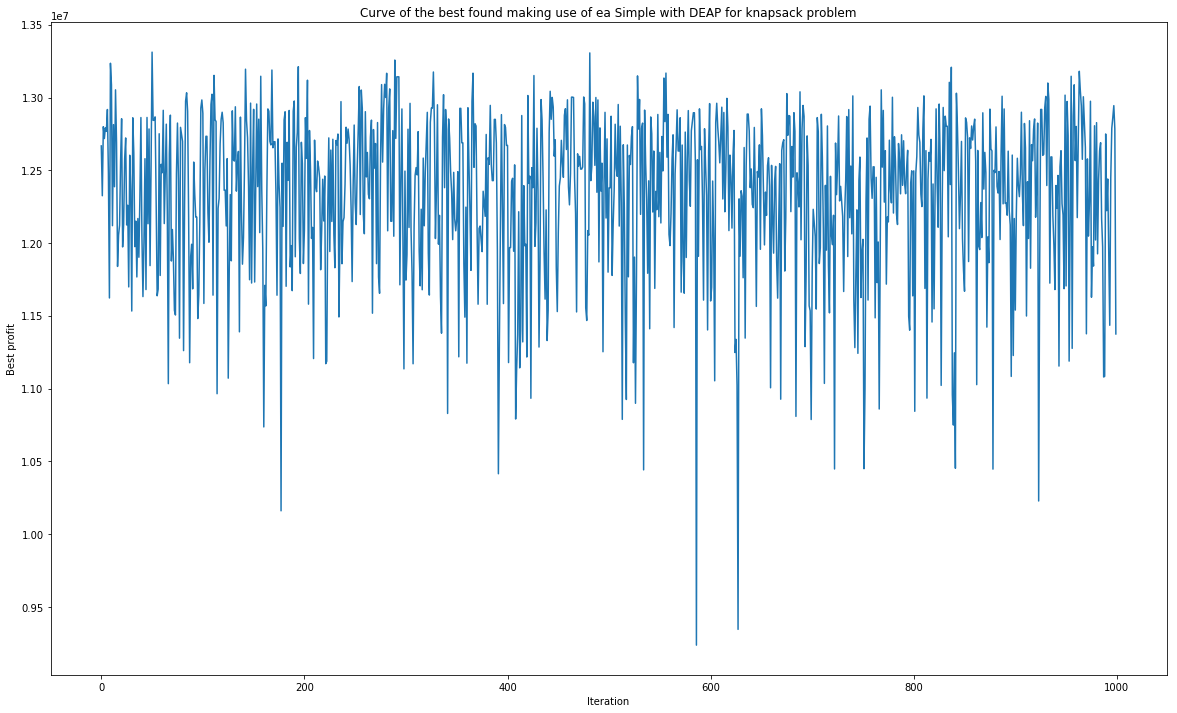

In [15]:
plot_curve(log, 'ea Simple')

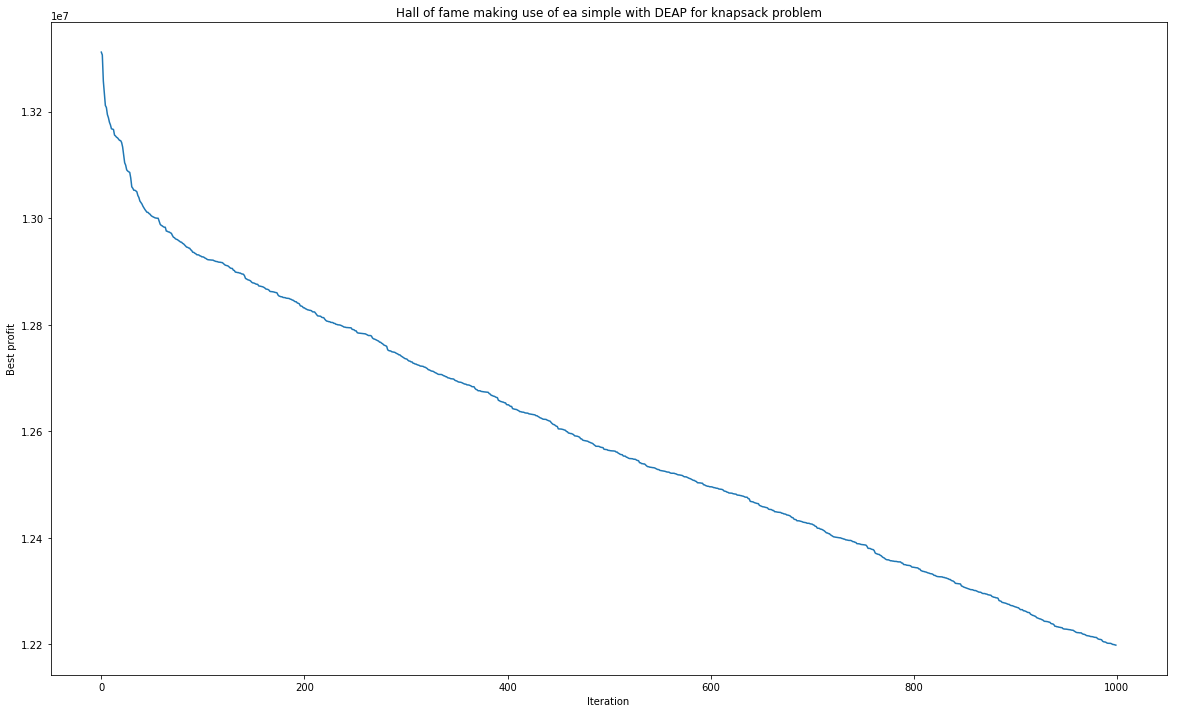

In [16]:
plot_hof(hof, 'ea simple')

In [17]:
print('Best profit found using simple ea: {}'.format(evalFct(hof[1])[0]))

Best profit found using simple ea: 13306616


In [18]:
log = algorithms.eaMuPlusLambda(population=pop, toolbox=toolbox, mu=5, lambda_=3, halloffame=hof, cxpb=0.5, mutpb=0.5,
                    ngen=iter, stats=stats)

gen	nevals	max        	min	avg        	std        
0  	0     	1.14447e+07	0  	7.74946e+06	4.00548e+06
1  	3     	1.06565e+07	9.22729e+06	9.95857e+06	622735     
2  	3     	1.13487e+07	7.60795e+06	8.8897e+06 	1.37846e+06
3  	3     	1.13487e+07	7.60795e+06	1.02042e+07	1.50806e+06
4  	3     	1.18094e+07	7.54082e+06	9.91178e+06	1.53358e+06
5  	3     	1.18094e+07	9.56266e+06	1.0792e+07 	959429     
6  	3     	1.09795e+07	9.7991e+06 	1.01018e+07	457403     
7  	3     	1.02341e+07	9.7991e+06 	1.00398e+07	199973     
8  	3     	1.05989e+07	9.7991e+06 	1.01794e+07	256131     
9  	3     	1.05989e+07	1.01324e+07	1.02664e+07	172368     
10 	3     	1.05989e+07	1.01324e+07	1.0319e+07 	228536     
11 	3     	1.05989e+07	9.18843e+06	1.0204e+07 	536076     
12 	3     	1.05989e+07	8.8386e+06 	1.01535e+07	681842     
13 	3     	1.05989e+07	8.8386e+06 	1.01535e+07	681842     
14 	3     	1.05989e+07	8.8386e+06 	9.89478e+06	862365     
15 	3     	1.05989e+07	8.8386e+06 	1.02468e+07	704118     
16 	3     	1.

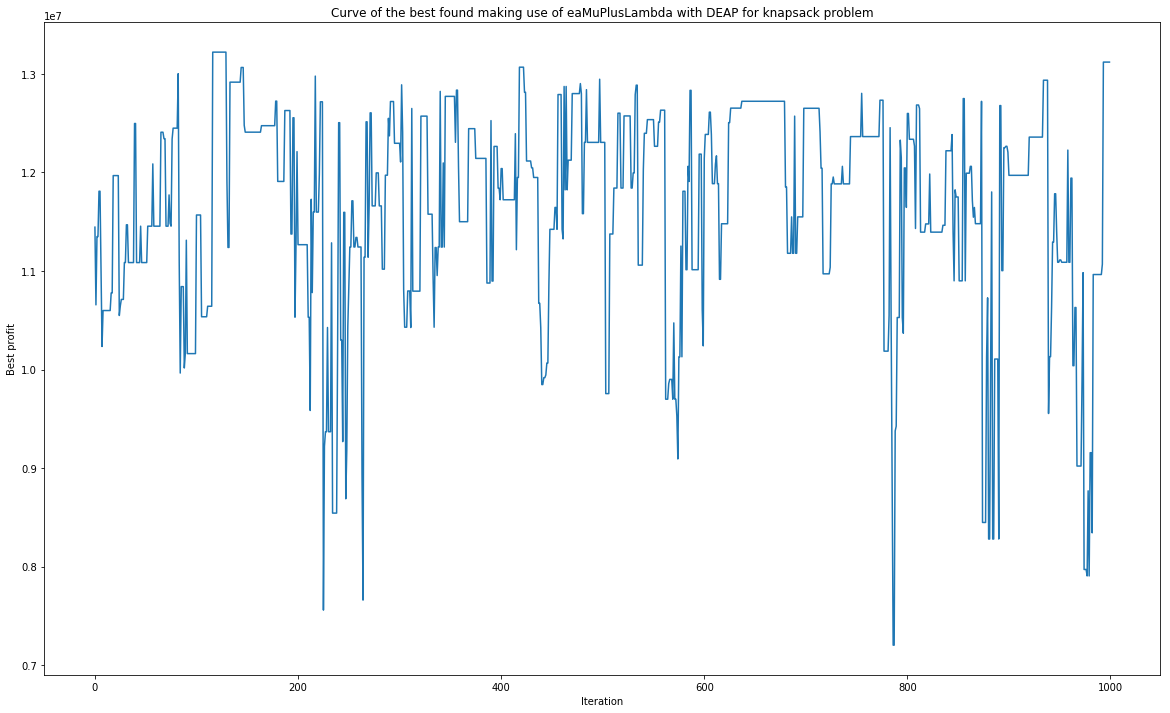

In [19]:
plot_curve(log, 'eaMuPlusLambda')

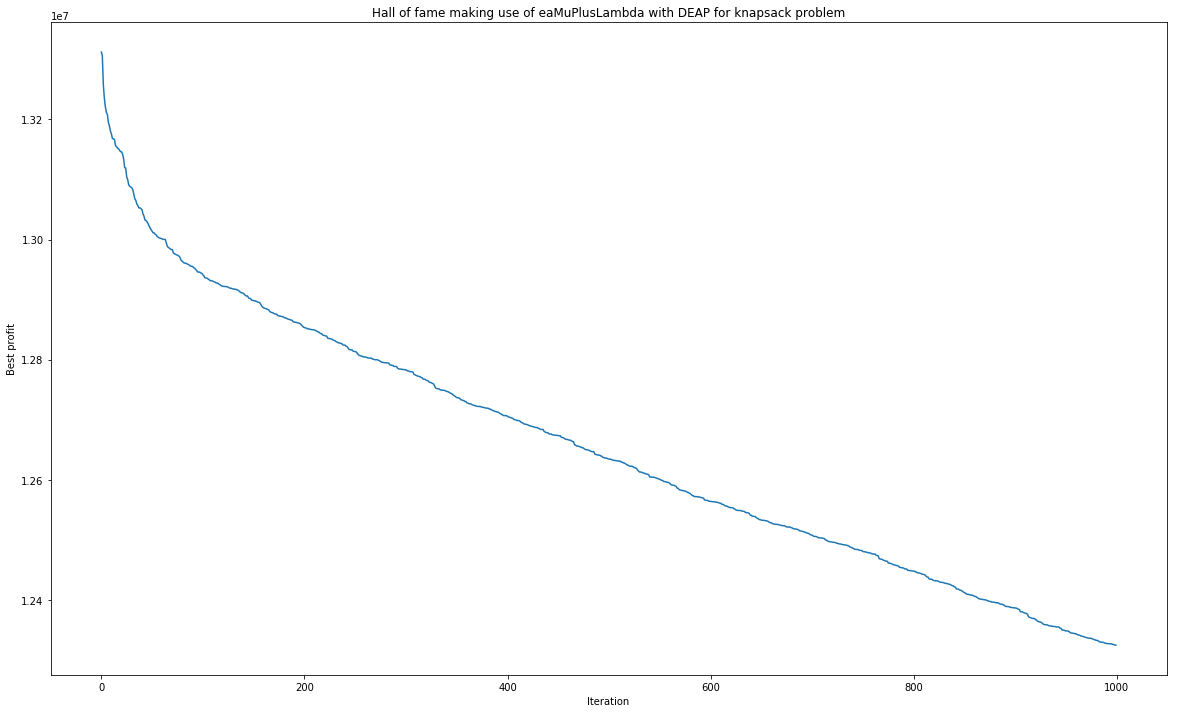

In [20]:
plot_hof(hof, 'eaMuPlusLambda')

In [21]:
print('Best profit found using ea mu plus lambda: {}'.format(evalFct(hof[1])[0]))

Best profit found using ea mu plus lambda: 13306616


In [22]:
log = algorithms.eaMuCommaLambda(population=pop, toolbox=toolbox, mu=5, lambda_=7, halloffame=hof, cxpb=0.5, mutpb=0.5,
                    ngen=iter, stats=stats)

gen	nevals	max        	min        	avg        	std   
0  	0     	1.31197e+07	1.12696e+07	1.21671e+07	829197
1  	7     	1.31197e+07	1.20569e+07	1.22695e+07	425106
2  	7     	1.27765e+07	1.20569e+07	1.23447e+07	352523
3  	7     	1.20569e+07	1.13991e+07	1.17938e+07	322269
4  	7     	1.19763e+07	8.61783e+06	1.03104e+07	1.4987e+06
5  	7     	1.14961e+07	9.5618e+06 	1.00929e+07	755137    
6  	7     	1.28309e+07	9.5618e+06 	1.16598e+07	1.43691e+06
7  	7     	1.29279e+07	1.02829e+07	1.18568e+07	1.28528e+06
8  	7     	1.16315e+07	7.71762e+06	9.65967e+06	1.64202e+06
9  	7     	1.08506e+07	6.46479e+06	8.97623e+06	1.49639e+06
10 	7     	1.056e+07  	9.52649e+06	1.01404e+07	336310     
11 	7     	1.13557e+07	9.16855e+06	1.00608e+07	825721     
12 	7     	1.22393e+07	9.16855e+06	1.03224e+07	1.41812e+06
13 	7     	1.26928e+07	9.16855e+06	1.05015e+07	1.63703e+06
14 	7     	1.00004e+07	9.16855e+06	9.66764e+06	407508     
15 	7     	1.00004e+07	6.8066e+06 	8.94632e+06	1.11959e+06
16 	7     	1.18026e+07	7

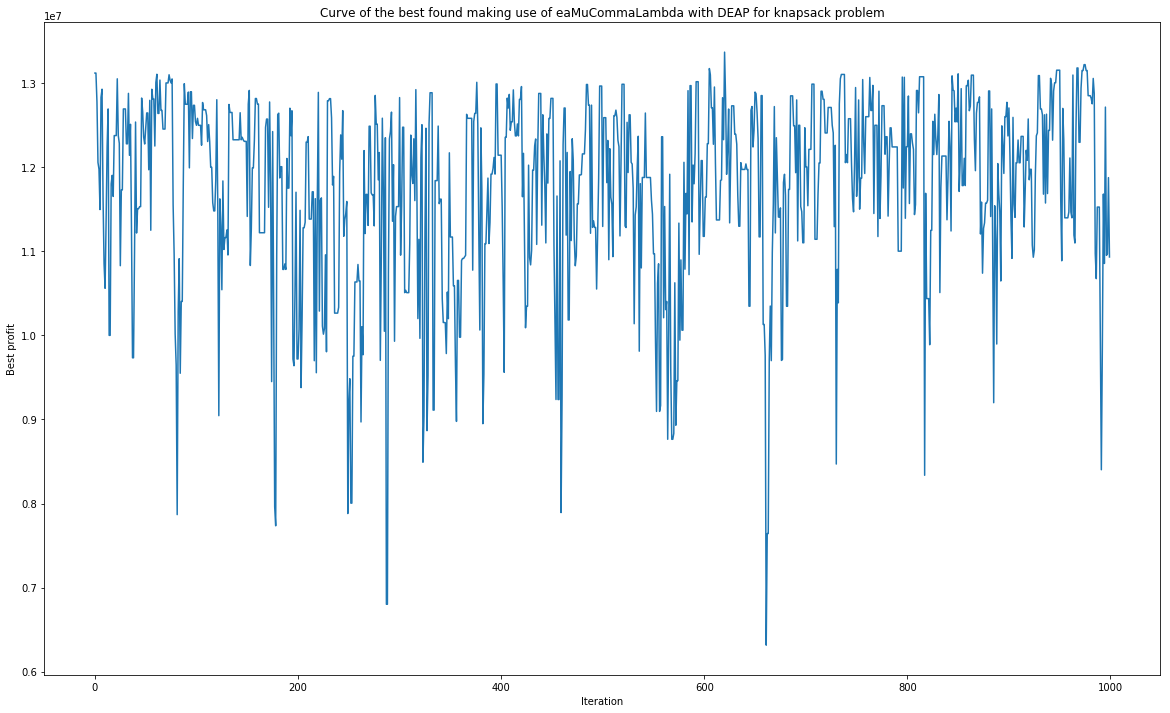

In [23]:
plot_curve(log, 'eaMuCommaLambda')

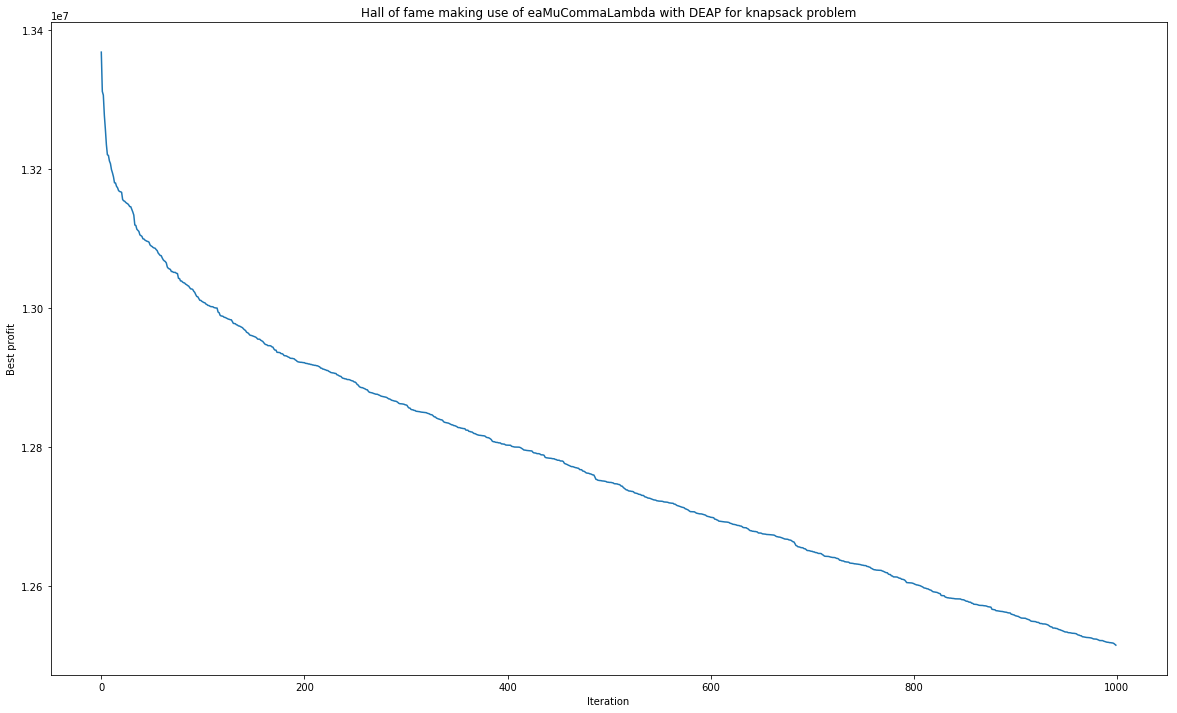

In [24]:
plot_hof(hof, 'eaMuCommaLambda')

In [25]:
print('Best profit found using ea mu comma lambda: {}'.format(evalFct(hof[1])[0]))

Best profit found using ea mu comma lambda: 13311943
